Project_1 visualization and testing

In [42]:
import pandas as pd
import os 
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np

np.set_printoptions(suppress=True)

#Decide what columns we need
A_csv = pd.read_csv('../xaa.csv')
B_csv = pd.read_csv('../xab.csv', header=None)
C_csv = pd.read_csv('../xac.csv', header=None)
D_csv = pd.read_csv('../xad.csv', header=None)
#Add correct index to split csv
B_csv.columns = A_csv.columns
C_csv.columns = A_csv.columns
D_csv.columns = A_csv.columns
#Merging
AB_csv = pd.merge(A_csv, B_csv,how='outer')

ABC_csv = pd.merge(AB_csv, C_csv,how='outer')

ABCD_csv = pd.merge(ABC_csv, D_csv,how='outer')

master_df = ABCD_csv

display(master_df.head(1))
       

,Year,StateAbbr,CityName,GeographicLevel,Category,Measure,DataValueTypeID,Data_Value_Type,Data_Value,PopulationCount,GeoLocation,CategoryID,MeasureId
0,2016,US,NaN,US,Prevention,Current lack of health insurance among adults ...,AgeAdjPrv,Age-adjusted prevalence,14.6,308745538,NaN,PREVENT,ACCESS2


In [76]:
#A_csv_drop = A_csv.drop(['Year', 'CityName','GeographicLevel','Data_Value_Type','PopulationCount','GeoLocation','MeasureId'], axis = 1)
#,'DataValueTypeID',  'Data_Value_Footnote', 'PopulationCount','GeoLocation', 'CategoryID', 'MeasureId', 'CityFIPS', 'TractFIPS','Short_Question_Text'], axis = 1)
#A_csv_drop_df = A_csv_drop.groupby(['StateAbbr', 'CategoryID', 'Measure']).mean()
#A_csv_drop_rename = A_csv_drop_df.rename(columns = {"Data_Value": "%_of_pop"})
#A_csv_drop_rename_ireset = A_csv_drop_rename.reset_index()
#A_csv_dri_outcome = A_csv_drop_rename_ireset.set_index("StateAbbr")

#display(A_csv_dri_outcome.head(),A_csv_drop_df.head())
master_df_rename = master_df.rename(columns = {"Data_Value": "Percent_of_pop"})
#For Syntax Reference <<<< only_billys = df.loc[df["first_name"] == "Billy", :] >>>>

# To remove all city sub tracts for mean by State aggregation 

master_df_re_adj = master_df_rename.loc[master_df_rename['DataValueTypeID']=='AgeAdjPrv',:]
#Drop Year
master_df_re_adj_noyr = master_df_re_adj.drop(columns = "Year")
display(
    len(master_df_re_adj_noyr['CityName'].unique()),
    master_df_re_adj_noyr.shape,
    len(master_df_rename['CityName'].unique()),
    master_df_rename.shape,   
    len(master_df['Measure'].unique())
)

475

(14028, 12)

475

(810103, 13)

28

In [78]:
#Creating a column to account for the people indicated in each measure category
#df= pd.DataFrame(range(5), columns=['a'])
#df.a = df.a.astype(float)
np.set_printoptions(suppress=True)
master_df_re_adj_noyr = master_df_re_adj_noyr.assign(Measure_pop = master_df_re_adj_noyr['Percent_of_pop'] / 100 * master_df_re_adj_noyr['PopulationCount'])

master_df_re_adj_noyr['Measure_pop'] = master_df_re_adj_noyr['Measure_pop'].fillna(0).astype(int)


print(master_df_re_adj_noyr['Measure_pop'].head())

0     45076848
2     71011473
4     55574196
6     90771188
8    178146175
Name: Measure_pop, dtype: int32


In [88]:
master_state_measure_df = master_df_re_adj_noyr.groupby(['StateAbbr', 'Measure']).sum()
#For syntax reference
#master_df_re_adj_noyr = master_df_re_adj_noyr.assign(Measure_pop = master_df_re_adj_noyr['Percent_of_pop'] / 100 * master_df_re_adj_noyr['PopulationCount'])
#Make True st percent and drop summed percent coln
master_state_measure_df = master_state_measure_df.assign(true_st_percent = master_state_measure_df['Measure_pop'] / master_state_measure_df['PopulationCount']*100)

master_state_measure_df.drop(columns = 'Percent_of_pop')


PopulationCount  \
StateAbbr Measure                                                               
AK        All teeth lost among adults aged >=65 Years                  291826   
          Arthritis among adults aged >=18 Years                       291826   
          Binge drinking among adults aged >=18 Years                  291826   
          Cancer (excluding skin cancer) among adults age...           291826   
          Cholesterol screening among adults aged >=18 Years           291826   
          Chronic kidney disease among adults aged >=18 Y...           291826   
          Chronic obstructive pulmonary disease among adu...           291826   
          Coronary heart disease among adults aged >=18 Y...           291826   
          Current asthma among adults aged >=18 Years                  291826   
          Current lack of health insurance among adults a...           291826   
          Current smoking among adults aged >=18 Years                 291826   
          Diagnosed diabetes among adults aged >=18 Years              291826   
          Fecal occult blood test, sigmoidoscopy, or colo...           291826   
          High blood pressure among adults aged >=18 Years             291826   
          High cholesterol among adults aged >=18 Years w...           291826   
          Mammography use among women aged 50–74 Years                 291826   
          Mental health not good for >=14 days among adul...           291826   
          No leisure-time physical activity among adults ...           291826   
          Obesity among adults aged >=18 Years                         291826   
          Older adult men aged >=65 Years who are up to d...           291826   
          Older adult women aged >=65 Years who are up to...           291826   
          Papanicolaou smear use among adult women aged 2...           291826   
          Physical health not good for >=14 days among ad...           291826   
          Sleeping less than 7 hours among adults aged >=...           291826   
          Stroke among adults aged >=18 Years                          291826   
          Taking medicine for high blood pressure control...           291826   
          Visits to dentist or dental clinic among adults...           291826   
          Visits to doctor for routine checkup within the...           291826   
AL        All teeth lost among adults aged >=65 Years                  965304   
          Arthritis among adults aged >=18 Years                       965304   
...                                                                       ...   
WV        Visits to dentist or dental clinic among adults...            51400   
          Visits to doctor for routine checkup within the...            51400   
WY        All teeth lost among adults aged >=65 Years                   59466   
          Arthritis among adults aged >=18 Years                        59466   
          Binge drinking among adults aged >=18 Years                   59466   
          Cancer (excluding skin cancer) among adults age...            59466   
          Cholesterol screening among adults aged >=18 Years            59466   
          Chronic kidney disease among adults aged >=18 Y...            59466   
          Chronic obstructive pulmonary disease among adu...            59466   
          Coronary heart disease among adults aged >=18 Y...            59466   
          Current asthma among adults aged >=18 Years                   59466   
          Current lack of health insurance among adults a...            59466   
          Current smoking among adults aged >=18 Years                  59466   
          Diagnosed diabetes among adults aged >=18 Years               59466   
          Fecal occult blood test, sigmoidoscopy, or colo...            59466   
          High blood pressure among adults aged >=18 Years              59466   
          High cholesterol among adults aged >=18 Years w...            59466   
          Ma

In [34]:
###Function_Time###only_billys = df.loc[df["first_name"] == "Billy", :]
#categoryid_list = master_df_re_adj_noyr['CategoryID'].unique()
#df_list = []
#for category in categoryid_list:
#        print(category)
#        df_list.append(master_df_re_adj_noyr.groupby(['StateAbbr', 'Measure']).Percent_of_pop.mean())
##Makes the same thing 3 times.        

#POPLUATION(DATA_VALUE/100) = NUMBER OF PEOPLE FOR MEASURE ID

#healthy_df = df_list[0]
#outcome_df = df_list[1]
#unhealthy_df = df_list[2]

#display(healthy_df.head(),
#outcome_df.head(),
#        unhealthy_df.head())
         
#master_doug_gb = master_df_re_adj_noyr.groupby(['CategoryID','StateAbbr', 'Measure']).Percent_of_pop.mean()

#big_measures_unstack = master_doug_gb.unstack()

#big_measures_unstack.keys()
#big_measures_unstack



TypeError: 'method' object is not subscriptable

In [17]:
master_df_re_adj_noyr.head(70)

,StateAbbr,CityName,GeographicLevel,Category,Measure,DataValueTypeID,Data_Value_Type,Percent_of_pop,PopulationCount,GeoLocation,CategoryID,MeasureId
0,US,NaN,US,Prevention,Current lack of health insurance among adults ...,AgeAdjPrv,Age-adjusted prevalence,14.6,308745538,NaN,PREVENT,ACCESS2
2,US,NaN,US,Health Outcomes,Arthritis among adults aged >=18 Years,AgeAdjPrv,Age-adjusted prevalence,23.0,308745538,NaN,HLTHOUT,ARTHRITIS
4,US,NaN,US,Unhealthy Behaviors,Binge drinking among adults aged >=18 Years,AgeAdjPrv,Age-adjusted prevalence,18.0,308745538,NaN,UNHBEH,BINGE
6,US,NaN,US,Health Outcomes,High blood pressure among adults aged >=18 Years,AgeAdjPrv,Age-adjusted prevalence,29.4,308745538,NaN,HLTHOUT,BPHIGH
8,US,NaN,US,Prevention,Taking medicine for high blood pressure contro...,AgeAdjPrv,Age-adjusted prevalence,57.7,308745538,NaN,PREVENT,BPMED
10,US,NaN,US,Health Outcomes,Cancer (excluding skin cancer) among adults ag...,AgeAdjPrv,Age-adjusted prevalence,5.9,308745538,NaN,HLTHOUT,CANCER
12,US,NaN,US,Health Outcomes,Current asthma among adults aged >=18 Years,AgeAdjPrv,Age-adjusted prevalence,8.8,308745538,NaN,HLTHOUT,CASTHMA
14,US,NaN,US,Health Outcomes,Coronary heart disease among adults aged >=18 ...,AgeAdjPrv,Age-adjusted prevalence,5.8,308745538,NaN,HLTHOUT,CHD
16,US,NaN,US,Prevention,Visits to doctor for routine checkup within th...,AgeAdjPrv,Age-adjusted prevalence,69.7,308745538,NaN,PREVENT,CHECKUP
18,US,NaN,US,Prevention,Cholesterol screening among adults aged >=18 Y...,AgeAdjPrv,Age-adjusted prevalence,75.2,308745538,NaN,PREVENT,CHOLSCREEN


In [103]:
####FUNCTION 2 
#df_healthy.reset_index()
#df_outcome.reset_index()
#df_unhealthy.reset_index()
####reset index 

big_unstack = unhealthy_df.unstack()

big_unstack.shape


(52, 28)

In [98]:
healthy_measures = df_healthy['Measure'].unique()
outcome_measures = df_outcome['Measure'].unique()
unhealthy_measures = df_unhealthy['Measure'].unique()

KeyError: 'Measure'

In [ ]:
master_df.groupby(['StateAbbr', 'CityName']).count()

In [9]:
##Original Work with oversized CSV##
#cities_500_csv_dropped_colns = cities_500_csv
#cities_500_csv_dropped_colns = cities_500_csv_dropped_colns[['Year', 'StateAbbr', 'CityName', 'CategoryID','Measure', 'Data_Value','GeoLocation']]
#average the meaningful data ('Measure')
#Mean_cities_measures_df = cities_500_csv_dropped_colns.groupby(['Year','StateAbbr','Measure']).mean()
#Mean_cities_measures_df.head()
#############################################

#Breaking into "HLTHOUT" , PREVENT, and UNHBEH
all_HLTHOUT = master_df.loc[master_df['CategoryID'] == 'HLTHOUT', :]
all_PREVENT = master_df.loc[master_df['CategoryID'] == 'PREVENT', :]
all_UNHBEH = master_df.loc[master_df['CategoryID'] == 'UNHBEH', :]

display(
    all_HLTHOUT.head(),
    all_HLTHOUT['Measure'].unique(),
    all_PREVENT.head(),
    all_PREVENT['Measure'].unique(),
    all_UNHBEH.head(),
    all_UNHBEH['Measure'].unique()
)

,Year,StateAbbr,CityName,GeographicLevel,Category,Measure,DataValueTypeID,Data_Value_Type,Data_Value,PopulationCount,GeoLocation,CategoryID,MeasureId
2,2016,US,NaN,US,Health Outcomes,Arthritis among adults aged >=18 Years,AgeAdjPrv,Age-adjusted prevalence,23.0,308745538,NaN,HLTHOUT,ARTHRITIS
3,2016,US,NaN,US,Health Outcomes,Arthritis among adults aged >=18 Years,CrdPrv,Crude prevalence,25.4,308745538,NaN,HLTHOUT,ARTHRITIS
6,2015,US,NaN,US,Health Outcomes,High blood pressure among adults aged >=18 Years,AgeAdjPrv,Age-adjusted prevalence,29.4,308745538,NaN,HLTHOUT,BPHIGH
7,2015,US,NaN,US,Health Outcomes,High blood pressure among adults aged >=18 Years,CrdPrv,Crude prevalence,31.9,308745538,NaN,HLTHOUT,BPHIGH
10,2016,US,NaN,US,Health Outcomes,Cancer (excluding skin cancer) among adults ag...,AgeAdjPrv,Age-adjusted prevalence,5.9,308745538,NaN,HLTHOUT,CANCER


array(['Arthritis among adults aged >=18 Years',
       'High blood pressure among adults aged >=18 Years',
       'Cancer (excluding skin cancer) among adults aged >=18 Years',
       'Current asthma among adults aged >=18 Years',
       'Coronary heart disease among adults aged >=18 Years',
       'Chronic obstructive pulmonary disease among adults aged >=18 Years',
       'Diagnosed diabetes among adults aged >=18 Years',
       'High cholesterol among adults aged >=18 Years who have been screened in the past 5 Years',
       'Chronic kidney disease among adults aged >=18 Years',
       'Mental health not good for >=14 days among adults aged >=18 Years',
       'Physical health not good for >=14 days among adults aged >=18 Years',
       'Stroke among adults aged >=18 Years',
       'All teeth lost among adults aged >=65 Years'], dtype=object)

,Year,StateAbbr,CityName,GeographicLevel,Category,Measure,DataValueTypeID,Data_Value_Type,Data_Value,PopulationCount,GeoLocation,CategoryID,MeasureId
0,2016,US,NaN,US,Prevention,Current lack of health insurance among adults ...,AgeAdjPrv,Age-adjusted prevalence,14.6,308745538,NaN,PREVENT,ACCESS2
1,2016,US,NaN,US,Prevention,Current lack of health insurance among adults ...,CrdPrv,Crude prevalence,11.6,308745538,NaN,PREVENT,ACCESS2
8,2015,US,NaN,US,Prevention,Taking medicine for high blood pressure contro...,AgeAdjPrv,Age-adjusted prevalence,57.7,308745538,NaN,PREVENT,BPMED
9,2015,US,NaN,US,Prevention,Taking medicine for high blood pressure contro...,CrdPrv,Crude prevalence,77.2,308745538,NaN,PREVENT,BPMED
16,2016,US,NaN,US,Prevention,Visits to doctor for routine checkup within th...,AgeAdjPrv,Age-adjusted prevalence,69.7,308745538,NaN,PREVENT,CHECKUP


array(['Current lack of health insurance among adults aged 18–64 Years',
       'Taking medicine for high blood pressure control among adults aged >=18 Years with high blood pressure',
       'Visits to doctor for routine checkup within the past Year among adults aged >=18 Years',
       'Cholesterol screening among adults aged >=18 Years',
       'Fecal occult blood test, sigmoidoscopy, or colonoscopy among adults aged 50–75 Years',
       'Papanicolaou smear use among adult women aged 21–65 Years',
       'Older adult men aged >=65 Years who are up to date on a core set of clinical preventive services: Flu shot past Year, PPV shot ever, Colorectal cancer screening',
       'Older adult women aged >=65 Years who are up to date on a core set of clinical preventive services: Flu shot past Year, PPV shot ever, Colorectal cancer screening, and Mammogram past 2 Years',
       'Visits to dentist or dental clinic among adults aged >=18 Years',
       'Mammography use among women aged 50–74 Y

,Year,StateAbbr,CityName,GeographicLevel,Category,Measure,DataValueTypeID,Data_Value_Type,Data_Value,PopulationCount,GeoLocation,CategoryID,MeasureId
4,2016,US,NaN,US,Unhealthy Behaviors,Binge drinking among adults aged >=18 Years,AgeAdjPrv,Age-adjusted prevalence,18.0,308745538,NaN,UNHBEH,BINGE
5,2016,US,NaN,US,Unhealthy Behaviors,Binge drinking among adults aged >=18 Years,CrdPrv,Crude prevalence,16.9,308745538,NaN,UNHBEH,BINGE
29,2016,US,NaN,US,Unhealthy Behaviors,Current smoking among adults aged >=18 Years,AgeAdjPrv,Age-adjusted prevalence,16.8,308745538,NaN,UNHBEH,CSMOKING
30,2016,US,NaN,US,Unhealthy Behaviors,Current smoking among adults aged >=18 Years,CrdPrv,Crude prevalence,16.4,308745538,NaN,UNHBEH,CSMOKING
39,2016,US,NaN,US,Unhealthy Behaviors,No leisure-time physical activity among adults...,AgeAdjPrv,Age-adjusted prevalence,23.7,308745538,NaN,UNHBEH,LPA


array(['Binge drinking among adults aged >=18 Years',
       'Current smoking among adults aged >=18 Years',
       'No leisure-time physical activity among adults aged >=18 Years',
       'Obesity among adults aged >=18 Years',
       'Sleeping less than 7 hours among adults aged >=18 Years'],
      dtype=object)

In [10]:
unhealthy_means = all_UNHBEH.groupby(['StateAbbr','Measure']).mean()
healthy_means = all_PREVENT.groupby(['StateAbbr','Measure']).mean()
outcome_means = all_HLTHOUT.groupby(['StateAbbr','Measure']).mean()

display(
    healthy_means.head(),
    outcome_means.head(),
    unhealthy_means.head()
)

%_of_pop
StateAbbr Measure                                                      
AK        Cholesterol screening among adults aged >=18 Years  68.815789
          Current lack of health insurance among adults a...  12.514035
          Fecal occult blood test, sigmoidoscopy, or colo...  61.336842
          Mammography use among women aged 50–74 Years        71.077193
          Older adult men aged >=65 Years who are up to d...  38.973684

%_of_pop
StateAbbr Measure                                                      
AK        All teeth lost among adults aged >=65 Years         13.161404
          Arthritis among adults aged >=18 Years              20.054386
          Cancer (excluding skin cancer) among adults age...   5.185965
          Chronic kidney disease among adults aged >=18 Y...   2.243860
          Chronic obstructive pulmonary disease among adu...   5.110526

%_of_pop
StateAbbr Measure                                                      
AK        Binge drinking among adults aged >=18 Years         19.294737
          Current smoking among adults aged >=18 Years        18.070175
          No leisure-time physical activity among adults ...  17.615789
          Obesity among adults aged >=18 Years                27.728070
          Sleeping less than 7 hours among adults aged >=...  31.268421

In [13]:
#Reset index for .loc

unhealthy_means = unhealthy_means.reset_index()



In [56]:
#Boolean measures
#only_billys = df.loc[df["first_name"] == "Billy", :]
unhealthy_means_binge= unhealthy_means.loc[unhealthy_means['Measure']=="Binge drinking among adults aged >=18 Years", :]


unhealthy_means_binge = unhealthy_means_binge.sort_values(by=['%_of_pop'],ascending=False)

unhealthy_means_binge["Rank"] = range(len(unhealthy_means_binge['StateAbbr']))#+1
                                                          
unhealthy_means_binge = unhealthy_means_binge.drop(columns = "level_0")
unhealthy_means_binge = unhealthy_means_binge.drop(columns = "index")
unhealthy_means_binge

,StateAbbr,Measure,%_of_pop,Rank
35,DC,Binge drinking among adults aged >=18 Years,23.308333,0
25,CO,Binge drinking among adults aged >=18 Years,19.664326,1
0,AK,Binge drinking among adults aged >=18 Years,19.294737,2
45,FL,Binge drinking among adults aged >=18 Years,17.491833,3
50,US,Binge drinking among adults aged >=18 Years,17.450000,4
20,CA,Binge drinking among adults aged >=18 Years,17.379456,5
15,AZ,Binge drinking among adults aged >=18 Years,16.724512,6
30,CT,Binge drinking among adults aged >=18 Years,16.018644,7
10,AR,Binge drinking among adults aged >=18 Years,15.385937,8
40,DE,Binge drinking among adults aged >=18 Years,15.092308,9


NameError: name 'ax1' is not defined

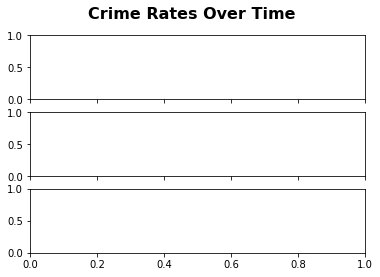

In [45]:
#Test Plots
# Plot
fig, (st_chol, st_bp, st_heart) = plt.subplots(3, sharex=True)
fig.suptitle("Crime Rates Over Time", fontsize=16, fontweight="bold")

ax1.set_xlim(min(year), max(year))
ax1.plot(year, violent_crime_rate, linewidth=1, marker="o")
ax1.plot(year, vc_fit, "b--", linewidth=1)
ax1.set_ylabel("Violent Crime Rate")


In [ ]:
#create df for healthy, unhealthy, and outcomes.

df_structure = pd.DataFrame ([
    {"State": 'TX', 'Measure': '%chol_screen>18', 'Rank': '16th'},
    {"State": 'CA', 'Measure': '%chol_screen>18', 'Rank': '3rd'},
    {"State": 'MI', 'Measure': '%chol_screen>18', 'Rank': '47th'}
    
])
df_structure

In [ ]:
#create df for healthy, unhealthy, and outcomes. Idea is to have them look like this
# Data frame title will denote the measure displayed in the table
df_structure = pd.DataFrame(
    {"State": ['TX', 'CA', 'MI'],
     "%_of_pop": ['75', '85', '59'],
     "Rank": ['7th', '3rd', '46th']}
)
df_structure



In [ ]:
## How to separate by healthy, unhealthy, and outcome.
#need to drop year col and group by state


In [ ]:
## Create ranking system with cities and states